In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
df_house_data = pd.read_csv("/Users/Durga/Desktop/DAT12/project 2/dsc-phase-2-project-main/data/kc_house_data.csv")

In [3]:
df_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
#remove unwanted columns
columns_to_remove = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
df_house_data_cleaned = df_house_data.drop(columns=columns_to_remove)


In [6]:
df_house_data_cleaned.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [7]:
#filling the missing value
df_house_data_cleaned['waterfront'].fillna(0, inplace=True)
# Using the round() function to round the float values before converting to integers
df_house_data_cleaned['bathrooms'] = df_house_data_cleaned['bathrooms'].round().astype(int)
df_house_data_cleaned['floors'] = df_house_data_cleaned['floors'].astype(int)

In [8]:
df_house_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  int64  
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  int64  
 7   waterfront   21597 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.8 MB


In [9]:
df_house_data_cleaned.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1,1180,5650,1,0.0,3,7,1955
1,6414100192,538000.0,3,2,2570,7242,2,0.0,3,7,1951
2,5631500400,180000.0,2,1,770,10000,1,0.0,3,6,1933
3,2487200875,604000.0,4,3,1960,5000,1,0.0,5,7,1965
4,1954400510,510000.0,3,2,1680,8080,1,0.0,3,8,1987


In [10]:
print(df_house_data_cleaned.isnull().sum())

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64


In [11]:
#Regression Modelling
Lets define the target variable Price and select the features for your regression analysis, follow these steps:
1.Target Variable (Dependent Variable):
The 'price' column, as it represents the sale price of the house.
2. Features (Independent Variables):
Selecting the columns in the dataset that can have impact on the target variable (house price).
These features should be potential predictors of house prices. Based on the provided dataset, some common features to consider include:
'bedrooms': Number of bedrooms in the house.
'bathrooms': Number of bathrooms in the house.
'sqft_living': Square footage of the home's living space.
'sqft_lot': Square footage of the lot.
'floors': Total number of floors (levels) in the house.
'waterfront': Indicator if the house has a view of the waterfront.
'condition': Overall condition of the house.
'grade': Overall grade given to the housing unit.
'yr_built': Year the house was built.



SyntaxError: invalid decimal literal (1580164569.py, line 3)

In [ ]:
##Exploratory Data Analysis :A correlation matrix is an important part of Exploratory Data Analysis (EDA). It helps in understanding the relationships between 
variables in your dataset. Here's how a correlation matrix fits into the EDA process 

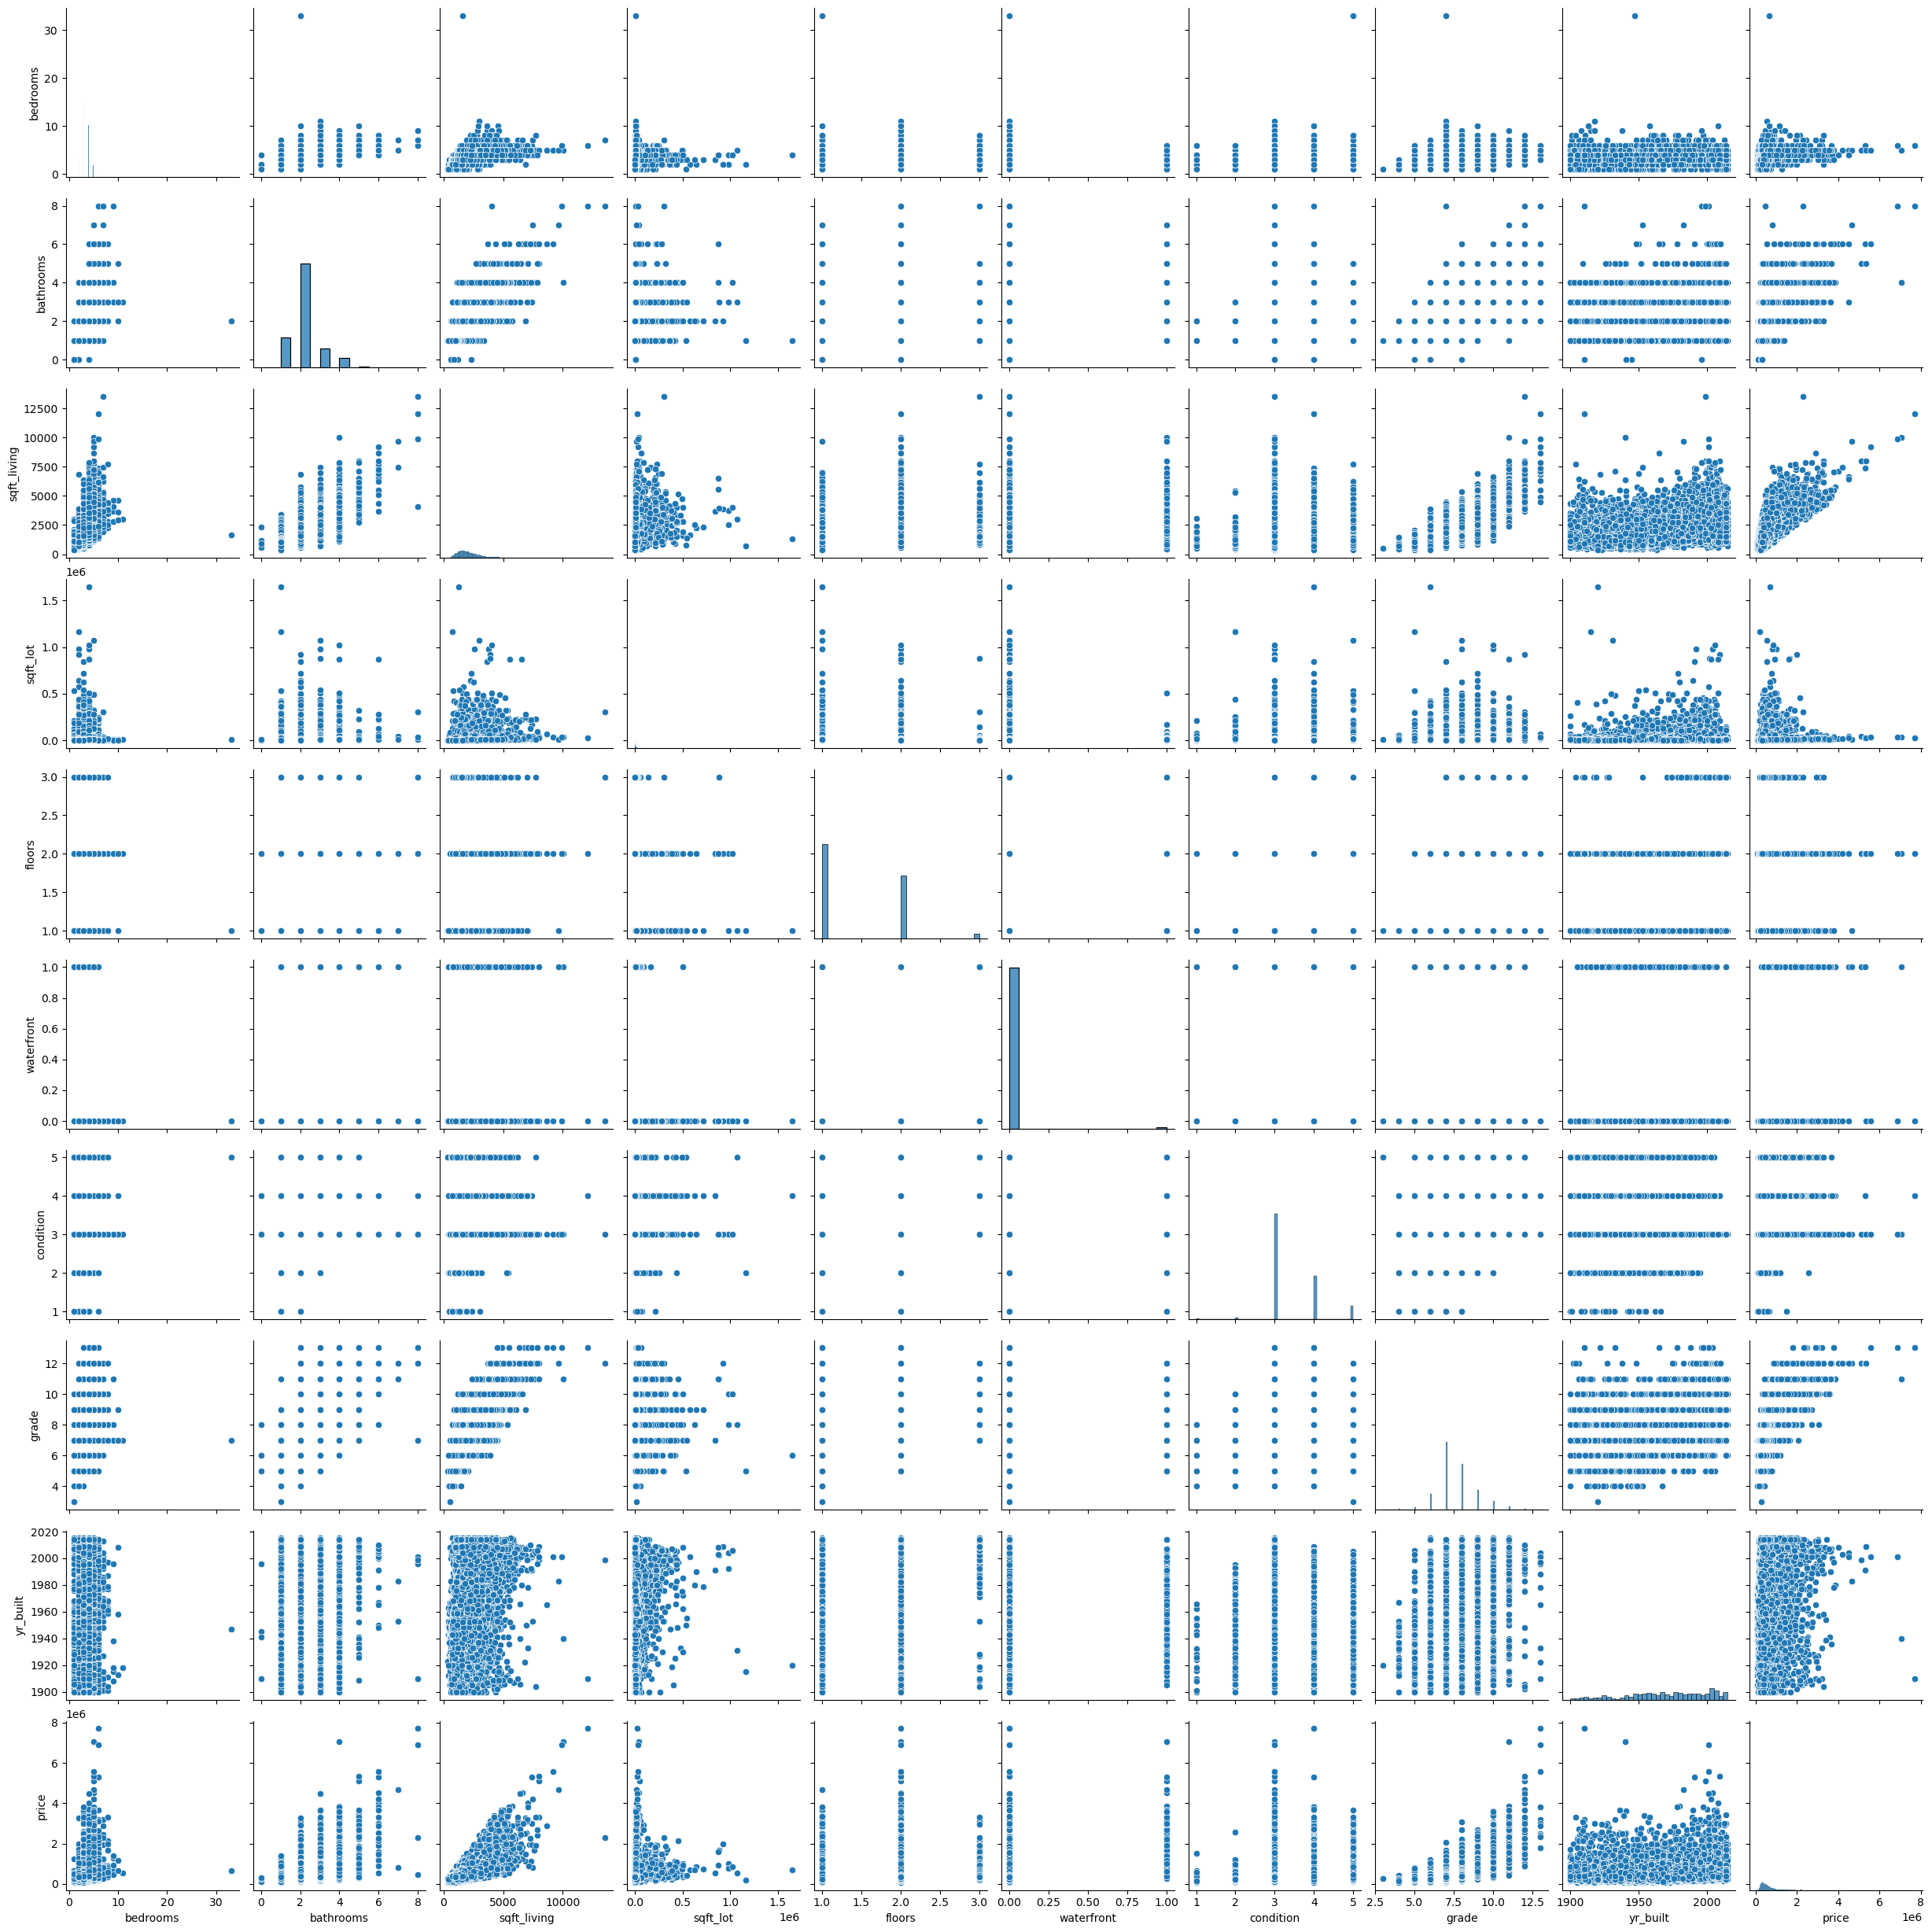

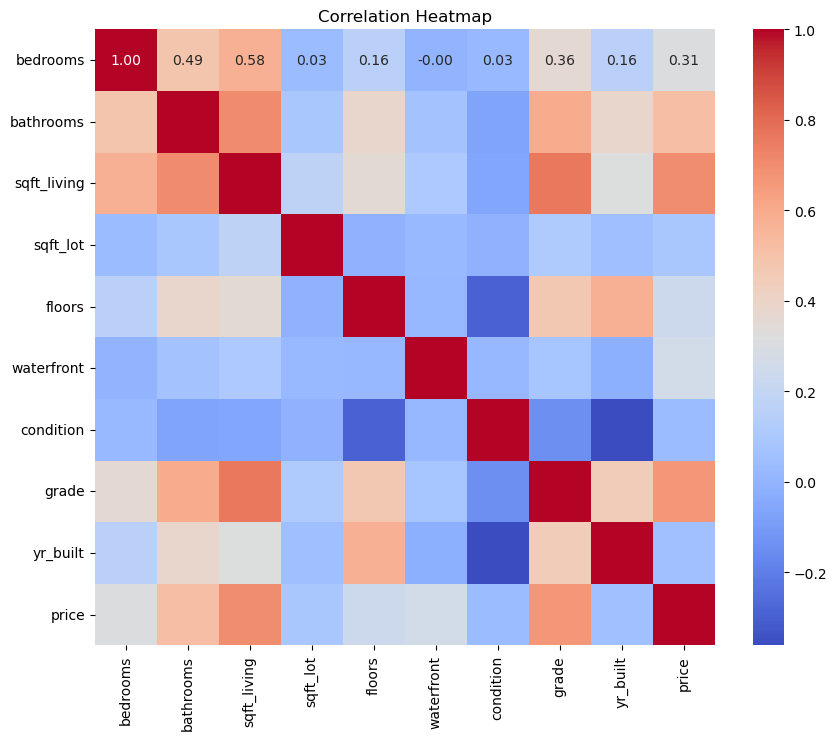

In [12]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Define target variable and features
target = 'price'
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']

# Pairplot to visualize relationships between numerical variables
sns.pairplot(df_house_data_cleaned[features + [target]])
plt.show()

# Correlation heatmap to visualize correlations between variables
correlation_matrix = df_house_data_cleaned[features + [target]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
* Strong Positive Correlations:
1.Square footage of living space (sqft_living) - This has the darkest red color next to "price," indicating the strongest positive 
correlation. Houses with larger living areas tend to sell for more.
2.Number of bathrooms (bathrooms) - This also has a dark red color next to "price," indicating a strong positive correlation. 
Houses with more bathrooms tend to sell for more.
3.Grade:This also has a dark red color next to "price," indicating a strong positive correlation. 
Houses with more grade tend to sell for more.                                                                                                                                                                 
* Moderate Positive Correlations:
1.Number of bedrooms (bedrooms) - This has a moderate red color next to "price," indicating a moderate positive correlation. 
Houses with more bedrooms tend to sell for more, but the correlation is not quite as strong as the number of bedrooms.
2.Size of the lot (square footage) (sqft_lot) - This has a faint red color next to "price," indicating a weak positive correlation.
There is a slight tendency for houses on larger lots to sell for more.

* Weak Positive Correlations:
1.Number of floors (floors) - This has a very faint red color next to "price," indicating a very weak positive correlation. 
There is almost no relationship between the number of floors in a house and its price.
                                                                                                                                                                                                                                                                                                                                                                                      
* Weak Negative Correlation:
1.Condition of the house (condition) - This has a faint blue color next to "price," indicating a weak negative correlation. 
There is a slight tendency for houses in poorer condition to sell for less money.

In [18]:
# OLS (Ordinary Least Squares) model for inference

# Define features and target
X = df_house_data_cleaned[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']]
y = df_house_data_cleaned['price']

# Add a constant term to the features
X = sm.add_constant(X)

### Step 2: Fit the OLS Model

# Fit the OLS model
model = sm.OLS(y, X).fit()

### Step 3: Review the Model Summary

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     4406.
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        22:46:39   Log-Likelihood:            -2.9613e+05
No. Observations:               21597   AIC:                         5.923e+05
Df Residuals:                   21587   BIC:                         5.924e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.602e+06    1.3e+05     50.851      

In [13]:
#categorical variable

# Convert "bathroom", "bedroom", "grade", and "floor" to categorical variables
df_house_data_cleaned['bathroom_cat'] = df_house_data_cleaned['bathrooms'].astype(str)
df_house_data_cleaned['bedroom_cat'] = df_house_data_cleaned['bedrooms'].astype(str)
df_house_data_cleaned['grade_cat'] = df_house_data_cleaned['grade'].astype(str)
#df_house_data_cleaned['floor_cat'] = df_house_data_cleaned['floors'].astype(str)
#df_house_data_cleaned['waterfront_cat'] = df_house_data_cleaned['waterfront'].astype(str)

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_house_data_cleaned, columns=['bathroom_cat', 'bedroom_cat','grade_cat'], prefix=['bathrooms', 'bedrooms','grade'])

# Select features and target variable
features = df_encoded.columns.drop(['price','floors', 'waterfront', 'condition'])
X = df_encoded[features]
y = df_encoded['price']

# Proceed with analysis or modeling using X and y

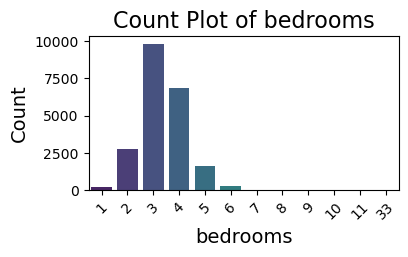

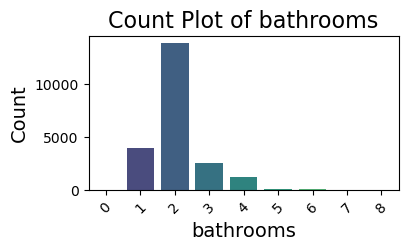

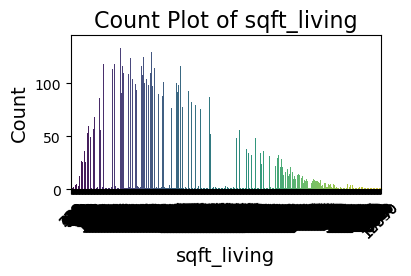

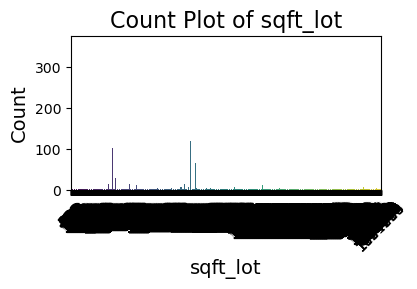

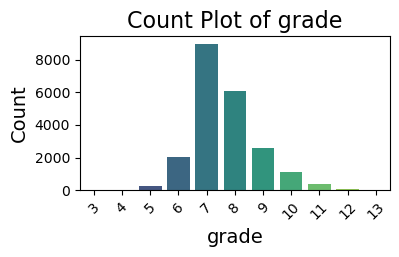

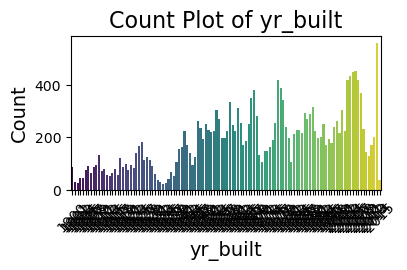

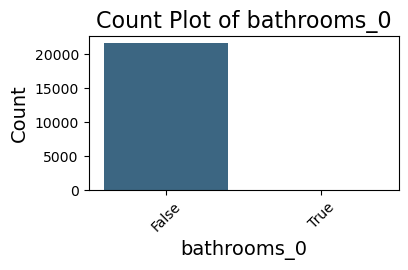

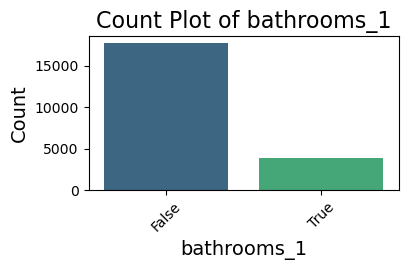

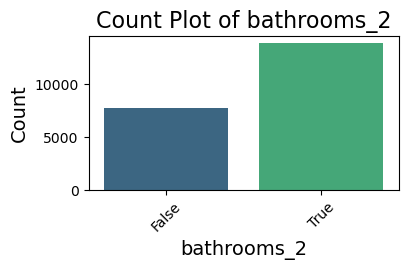

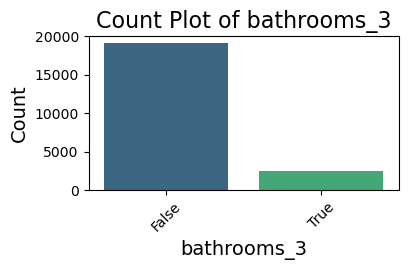

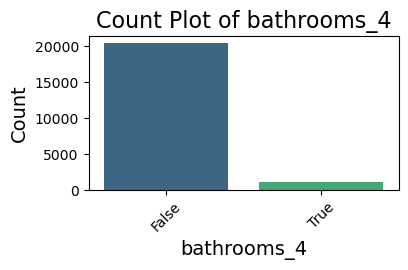

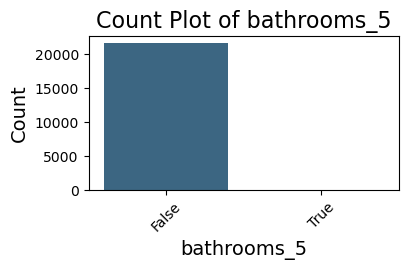

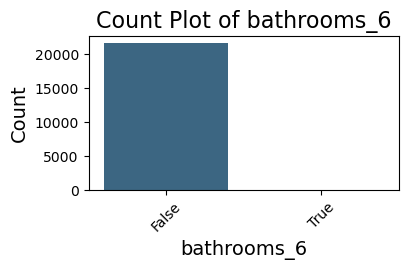

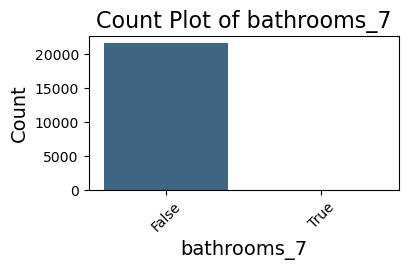

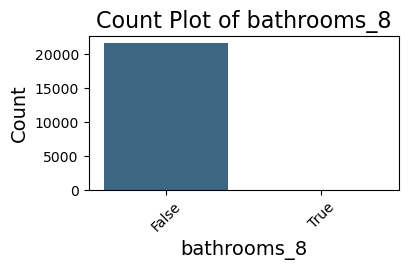

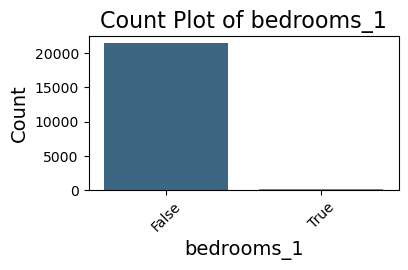

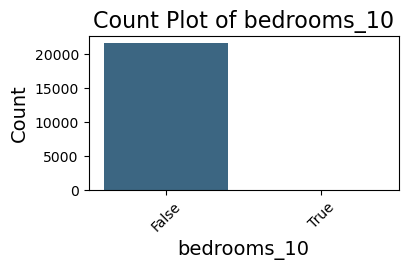

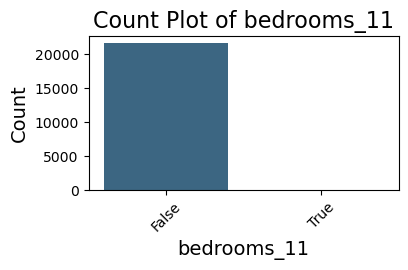

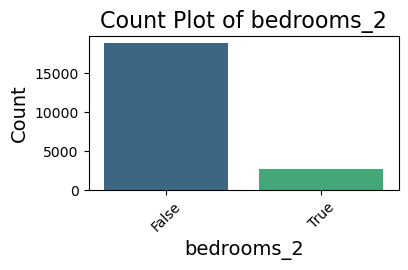

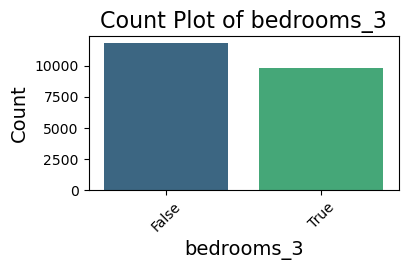

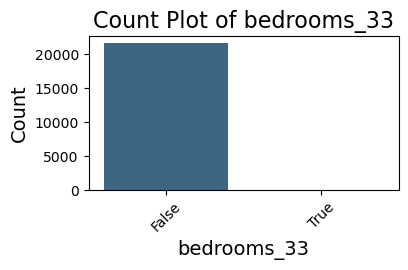

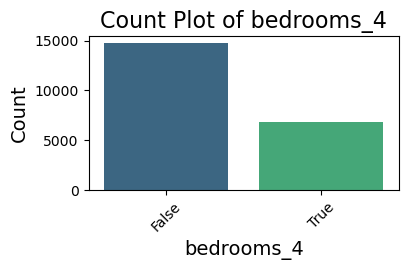

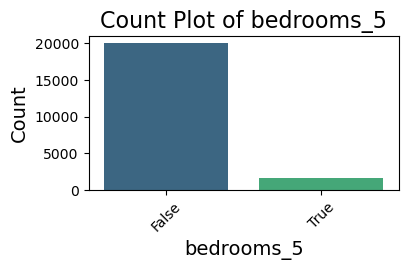

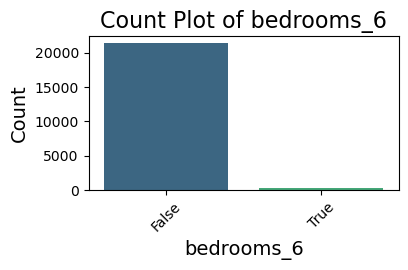

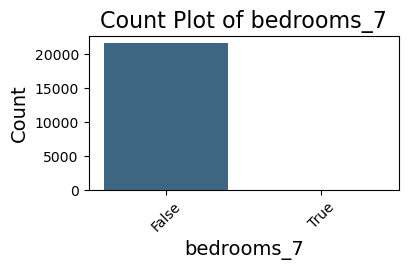

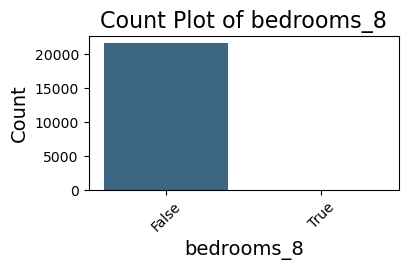

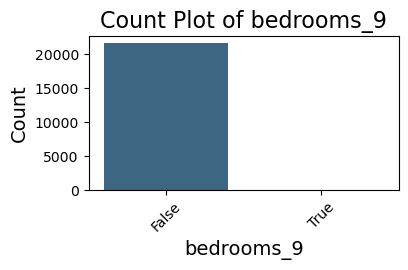

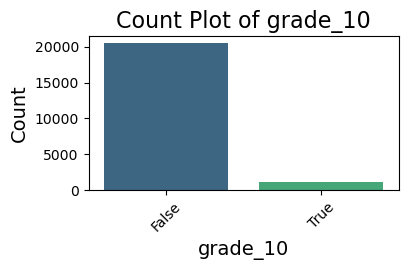

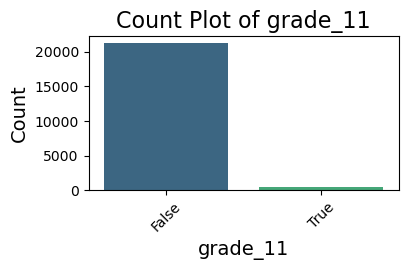

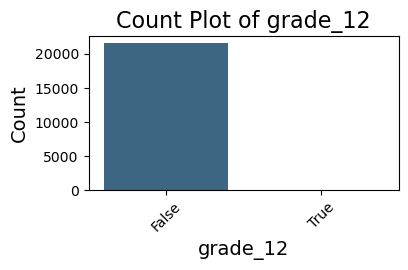

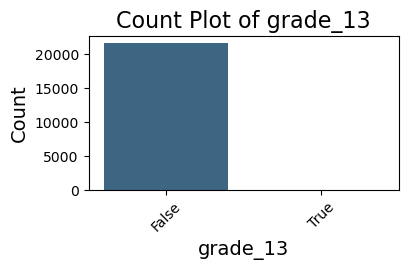

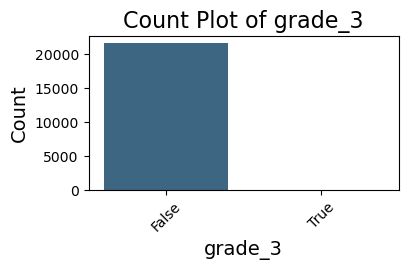

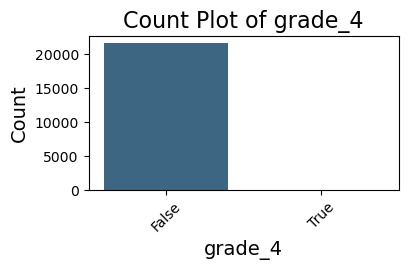

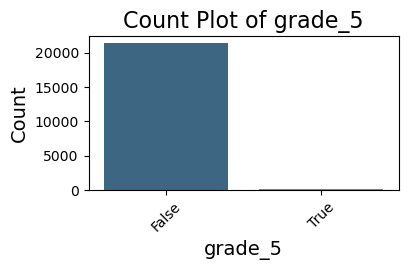

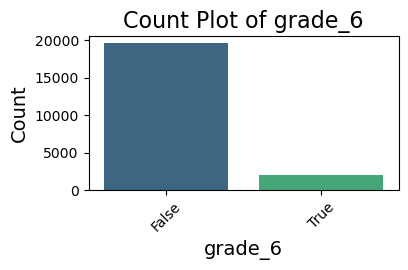

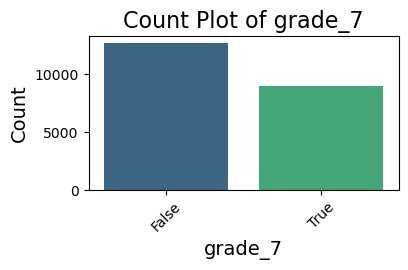

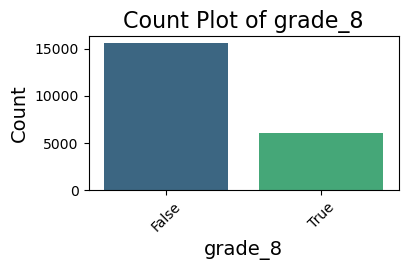

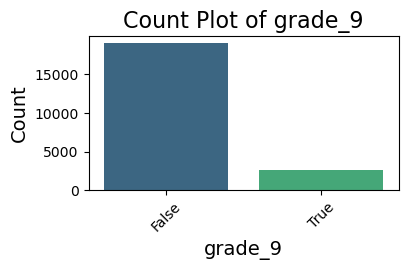

In [19]:
# Selecting the one-hot encoded categorical columns
categorical_columns_encoded = [col for col in df_encoded.columns if any(prefix in col for prefix in ['bathrooms', 'bedrooms','grade','sqft_living', 'sqft_lot','yr_built'])]

# Looping through each one-hot encoded categorical column and creating count plots
for column in categorical_columns_encoded:
    plt.figure(figsize=(4, 2))
    sns.countplot(data=df_encoded, x=column, palette='viridis')
    plt.title(f'Count Plot of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
1.Train-Test Split: The data is split into training and testing sets using the train_test_split() function from scikit-learn. 
This allows for evaluating the model's performance on unseen data.
2.Linear Regression Model: A linear regression model is initialized using scikit-learn's LinearRegression() class.
3.Model Fitting: The model is trained on the training data using the fit() method.
4.Prediction: Predictions are made on the testing data using the predict() method.
5.Model Evaluation: The mean squared error (MSE), root mean squared error (RMSE), and R-squared values are calculated to assess 
the model's performance on the testing data.
6.Visualization: A scatter plot is created to visualize the relationship between the predicted and actual prices.
7.Interpretation: The coefficients of the features are printed to understand their influence on the predicted prices.

Testing Data Evaluation:
Mean Squared Error: 51056048785.58351
Root Mean Squared Error: 225955.8558337967
R-squared: 0.6079134748656662


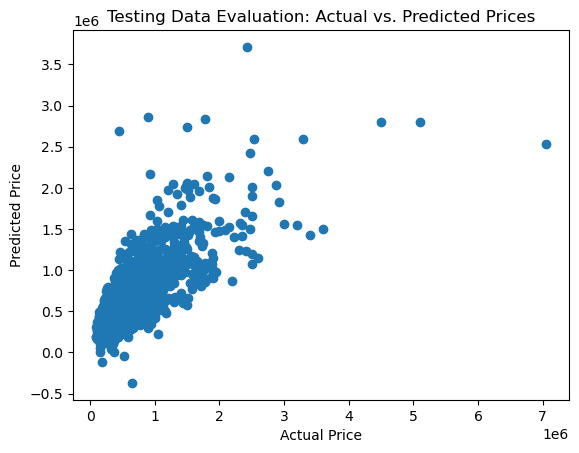

id : -1.3085975856450426e-06
bedrooms : -27883.361433763195
bathrooms : 200019.56005367634
sqft_living : 150.00713222838027
sqft_lot : -0.35788576650152637
grade : 184874.75351194665
yr_built : -3402.024223017831
bathrooms_0 : 258428.77618448943
bathrooms_1 : 156102.3471137134
bathrooms_2 : -14869.24187308122
bathrooms_3 : -158412.24611377463
bathrooms_4 : -295297.5330019494
bathrooms_5 : -163295.29780306685
bathrooms_6 : -142561.13636512475
bathrooms_7 : -522691.14532965526
bathrooms_8 : 882595.4772616103
bedrooms_1 : -12244.0073280306
bedrooms_10 : 18771.858350052822
bedrooms_11 : -86602.31325642519
bedrooms_2 : 18490.671889648853
bedrooms_3 : -4066.1194581323093
bedrooms_33 : -7.745256880298257e-08
bedrooms_4 : -16955.28950509411
bedrooms_5 : 10926.504199031955
bedrooms_6 : 12803.479783221543
bedrooms_7 : -97535.60966988247
bedrooms_8 : 64072.17057305177
bedrooms_9 : 92338.65451562087
grade_10 : -300071.6720498246
grade_11 : -209035.28812305548
grade_12 : 38130.57472649102
grade_13 

In [14]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Testing Data Evaluation:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Visualize the relationship between the predicted and actual prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Testing Data Evaluation: Actual vs. Predicted Prices")
plt.show()

# Interpretation and analysis (e.g., coefficient values)
coefficients = model.coef_
for feature, coef in zip(features, coefficients):
    print(feature, ':', coef)

Training Data Evaluation:
Mean Squared Error (MSE): 46475275094.99554
Root Mean Squared Error (RMSE): 215581.24940494137
R-squared (R²): 0.6585964821129644


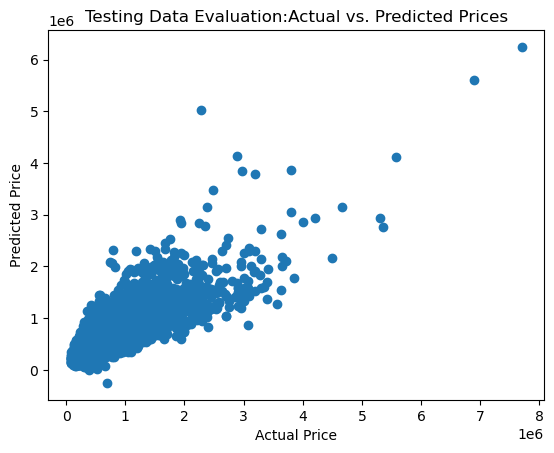

In [15]:
# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate MSE, RMSE, and R-squared for the training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("Training Data Evaluation:")
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("R-squared (R²):", r2_train)

# Visualize the relationship between the predicted and actual prices
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Testing Data Evaluation:Actual vs. Predicted Prices")
plt.show()

In [ ]:
Analysis
Model Fit: The R-squared values suggest a moderate fit for both the training and testing datasets. While the model captures a significant 
portion of the variance in house prices, there is still room for improvement.
Generalization: The model performs reasonably well on both training and testing sets, indicating that it generalizes fairly well to 
unseen data. However, the slightly lower R-squared and higher RMSE for the testing set suggest some degree of overfitting.

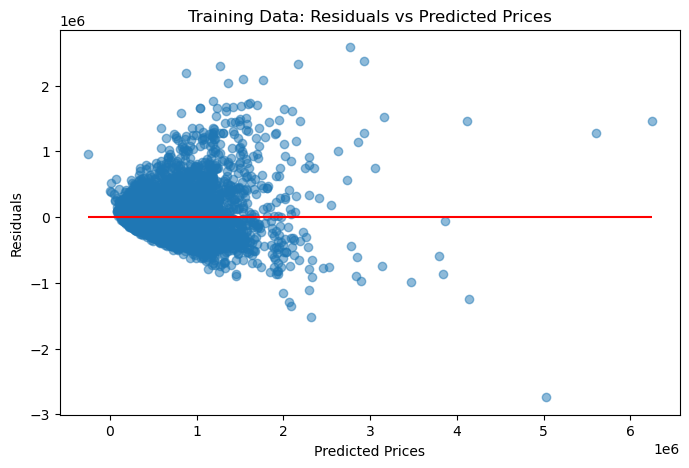

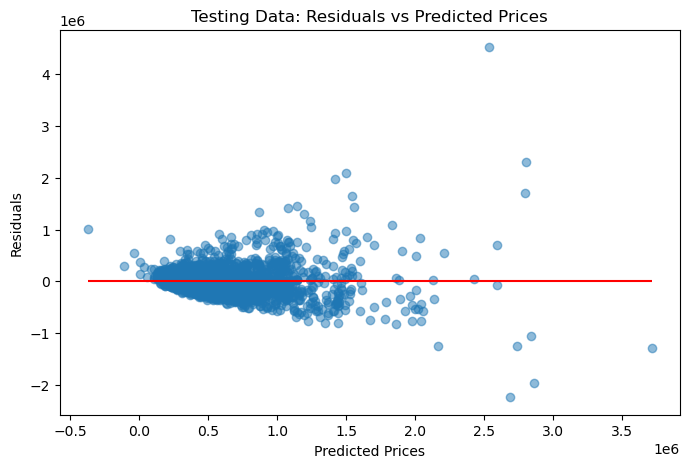

In [16]:
# Plotting residuals for training data
train_residuals = y_train - y_train_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_train_pred), xmax=max(y_train_pred), colors='red')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Training Data: Residuals vs Predicted Prices")
plt.show()


# Plotting residuals for testing data
test_residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, test_residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Testing Data: Residuals vs Predicted Prices")
plt.show()


In [17]:
# Calculate mean and standard deviation of training residuals
train_residuals_mean = train_residuals.mean()
train_residuals_std = train_residuals.std()

# Print training residuals statistics
print("Training Residuals:")
print("Mean:", train_residuals_mean)
print("Standard Deviation:", train_residuals_std)

# Calculate mean and standard deviation of testing residuals
test_residuals_mean = test_residuals.mean()
test_residuals_std = test_residuals.std()

# Print testing residuals statistics
print("\nTesting Residuals:")
print("Mean:", test_residuals_mean)
print("Standard Deviation:", test_residuals_std)

Training Residuals:
Mean: 7.892011433499979e-10
Standard Deviation: 215587.48864231847

Testing Residuals:
Mean: -5711.565814452754
Standard Deviation: 225909.80614973872


In [ ]:
Analysis
Training Residuals: The mean residual is essentially zero, indicating that, on average, the model predictions are unbiased on the training data.
The standard deviation of 215,587.49
215,587.49 suggests that most predictions deviate from the mean by approximately 215,587.49
215,587.49, which is relatively high but might be acceptable depending on the context.
Testing Residuals: The mean residual of −5711.57
−5711.57 suggests that, on average, the model tends to underestimate house prices by $5711.57 in the testing data. The standard deviation 
of 225,909.81.
225,909.81 indicates that prediction errors in the testing data have a wider spread compared to the training data.

In [ ]:

From the regression modeling results, we can infer several insights relevant to advising homeowners on how home renovations might impact 
the estimated value of their homes:

1.Mean Squared Error (MSE) and Root Mean Squared Error (RMSE): While the RMSE values are relatively high, they still provide an 
estimate of the average prediction error.
2.R-squared (R²) Value:The R-squared values for both training and testing data are moderate, suggesting that the model explains a
significant portion of the variability in home prices, but there is still room for improvement.
3.Residual Analysis::The mean residuals being close to zero for the training data indicate that, on average, the model predictions
are unbiased. However, the mean residual for the testing data being non-zero suggests a potential bias in predictions.
The standard deviation of residuals indicates the variability or dispersion of prediction errors. While the standard deviation is 
relatively high, it reflects the variability in home prices that the model struggles to capture accurately.
                                        

In [ ]:
## Conclusions
Practical Implications for Homeowners
Renovations and Value:

1.Focus on Key Areas: According to our findings, larger living spaces and more bedrooms strongly influence home prices. If you're considering
renovations, adding a bedroom or expanding your living space might significantly increase your home’s value.
2.Moderate Influences: Adding bathrooms or increasing the lot size have a moderate impact. These renovations could still add value but
might not be as impactful as expanding living space or adding bedrooms.
3.Minor Influences: The number of floors and the condition of the house have weaker impacts. While these factors do affect the price, 
they aren't as strong predictors as the ones mentioned above.
4.Model Limitations:Not Perfect Predictions: While our model provides good guidance, it’s not perfect. The high prediction error means 
that there are other factors affecting home prices that our model doesn’t account for. Always consider other local factors and market
conditions.
5.Continuous Improvement: We can improve our predictions by refining our model and including more relevant data. Home prices are 
influenced by many variables, and capturing more of these will help us make better predictions.

In [ ]:
Summary
In short, our model is a useful tool that can help us understand how certain renovations might impact the home’s value. However, it's 
important to remember that it's not infallible and there are other factors at play. Using this model alongside expert advice and local
market conditions will give us the best insights for making renovation decisions.